In [2]:
library(DESeq2)
library(ggplot2)
library(ggfortify)
library(devtools)
library(ellipse)
library(cluster)
library(factoextra)
library(EnhancedVolcano)
library(grid)
library(gridExtra)
library(genefilter)

In [3]:
countData <- read.csv('DESEQ2input/Mousechat-assembleddump-95.txt', header = TRUE, sep = ",", check.names=FALSE)
head(countData)

metaData <- read.csv('DESEQ2input/chat-metadata.csv', header = TRUE, sep = ",", check.names=FALSE)
metaData

dds <- DESeqDataSetFromMatrix(countData=countData, 
                              colData=metaData, 
                              design=~dex, tidy = TRUE)
keep <- rowSums(counts(dds)) > 0
dds <- dds[keep,]

dds

dds <- DESeq(dds)

res <- results(dds)
head(results(dds, tidy=TRUE)) #let's look at the results table

summary(res) #summary of results

res <- res[order(res$padj),]
head(res)

vsdata <- varianceStabilizingTransformation(dds, blind=FALSE)

vsdata2 <- data.frame(assay(vsdata))
res <- data.frame(res)

res2 <- merge(vsdata2, res, by="row.names")
#res2$ClusterID <- row.names(res2)
res2$Row.names <- as.numeric(gsub("Cluster", "", res2$Row.names))
#coltomove <- grep('ClusterID', names(res2))
#res2 <- res2[, c(coltomove, (1:ncol(res2))[-coltomove])]

#write.csv(res2, "ChatMB-SC-DESEQ2-65.csv", row.names=FALSE)

,Cluster,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Cluster0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Cluster1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cluster2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cluster3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Cluster4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Cluster5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


id,dex,celltype,geo_id
<int>,<fct>,<fct>,<int>
1,control,fecal,1
2,control,fecal,2
3,control,fecal,3
4,control,fecal,4
5,control,fecal,5
6,control,fecal,6
7,control,fecal,7
8,control,fecal,8
9,control,fecal,9


  it appears that the last variable in the design formula, 'dex',
  has a factor level, 'control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').



class: DESeqDataSet 
dim: 1748 17 
metadata(1): version
assays(1): counts
rownames(1748): Cluster6 Cluster11 ... Cluster36412 Cluster36546
rowData names(0):
colnames(17): 1 2 ... 16 17
colData names(4): id dex celltype geo_id

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 13 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cluster6,0.2028573,1.2407343,2.7656958,0.4486156,0.653708963,NA
2,Cluster11,3.6478669,-2.4742167,0.8449102,-2.9283782,0.003407353,0.09807251
3,Cluster13,0.2763997,-1.7366703,2.9588186,-0.5869472,0.557239155,NA
4,Cluster19,0.5109991,2.4039341,2.4327627,0.9881499,0.323079264,NA
5,Cluster22,0.3550002,1.8908143,3.0339021,0.6232285,0.533134361,NA
6,Cluster24,0.1014286,0.5995539,1.0541899,0.5687342,0.569536540,NA



out of 1744 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 17, 0.97%
LFC < 0 (down)     : 6, 0.34%
outliers [1]       : 0, 0%
low counts [2]     : 1086, 62%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



log2 fold change (MLE): dex control vs activated 
Wald test p-value: dex control vs activated 
DataFrame with 6 rows and 6 columns
                     baseMean    log2FoldChange             lfcSE
                    <numeric>         <numeric>         <numeric>
Cluster21023 7.95606145980347  -2.4438605498806 0.578258556834746
Cluster21064  11.521677237072 -1.25558152107207 0.312808006669715
Cluster3818  3.33216547132179  3.23452545714114  0.85438447022315
Cluster8558  1.90115766110368  4.30257672625962  1.14410074158235
Cluster19956 1.19870195001309  3.62863647182079 0.977416702232892
Cluster30880  1.2663184704653  3.70496170352275  1.00783988468799
                          stat               pvalue               padj
                     <numeric>            <numeric>          <numeric>
Cluster21023 -4.22624191375174 2.37626526386281e-05 0.0157308760467718
Cluster21064 -4.01390467731155 5.97224730199441e-05 0.0197681385696015
Cluster3818   3.78579617241444 0.000153217226523443 0.026

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,14.48936,6.548284,5.473491,5.013713,4.900518,4.472838,4.410789,4.24955,4.186417,4.122806,3.857342,3.809785,3.591579,3.476884,3.376462,3.20016,5.119196e-15
Proportion of Variance,0.41988,0.085760,0.059920,0.050270,0.048030,0.040010,0.038910,0.03612,0.035050,0.034000,0.029760,0.029030,0.025800,0.024180,0.022800,0.02048,0.000000e+00
Cumulative Proportion,0.41988,0.505640,0.565560,0.615840,0.663870,0.703880,0.742790,0.77891,0.813960,0.847950,0.877710,0.906740,0.932540,0.956720,0.979520,1.00000,1.000000e+00


pdf 
  2

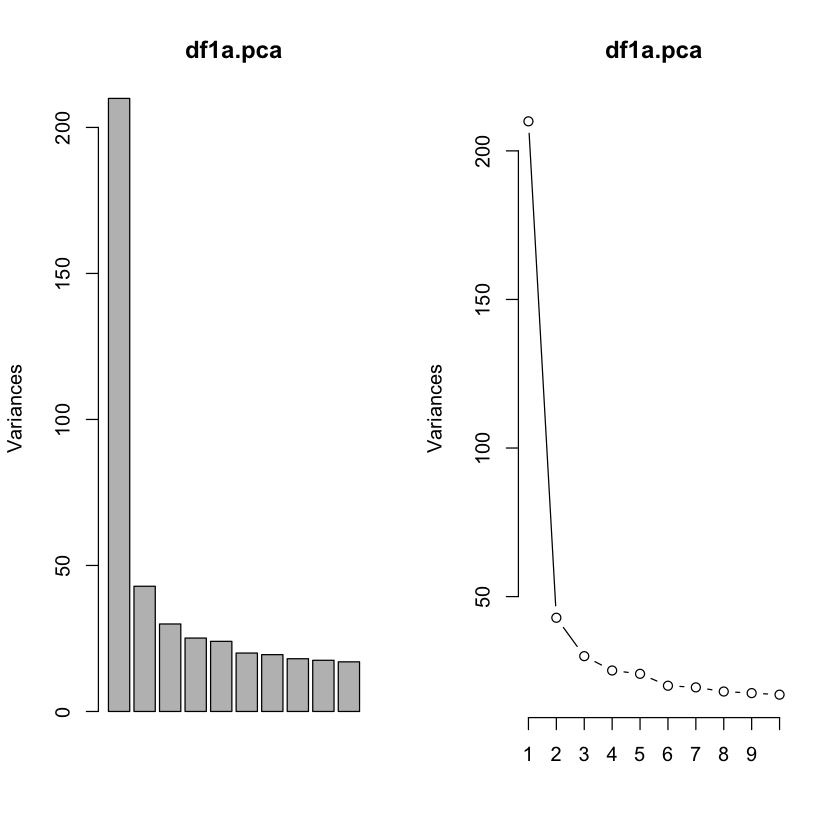

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,20.38257,13.10912,11.98584,11.07997,10.63478,10.31375,9.770821,9.109654,8.778856,8.636476,8.282508,7.847336,7.820828,7.378627,7.067243,6.996849,3.399459e-14
Proportion of Variance,0.23767,0.09831,0.08219,0.07023,0.06470,0.06085,0.054620,0.047470,0.044090,0.042670,0.039240,0.035230,0.034990,0.031150,0.028570,0.028010,0.000000e+00
Cumulative Proportion,0.23767,0.33598,0.41817,0.48840,0.55310,0.61396,0.668570,0.716050,0.760140,0.802810,0.842050,0.877280,0.912270,0.943420,0.971990,1.000000,1.000000e+00


pdf 
  2

pdf 
  2

pdf 
  2

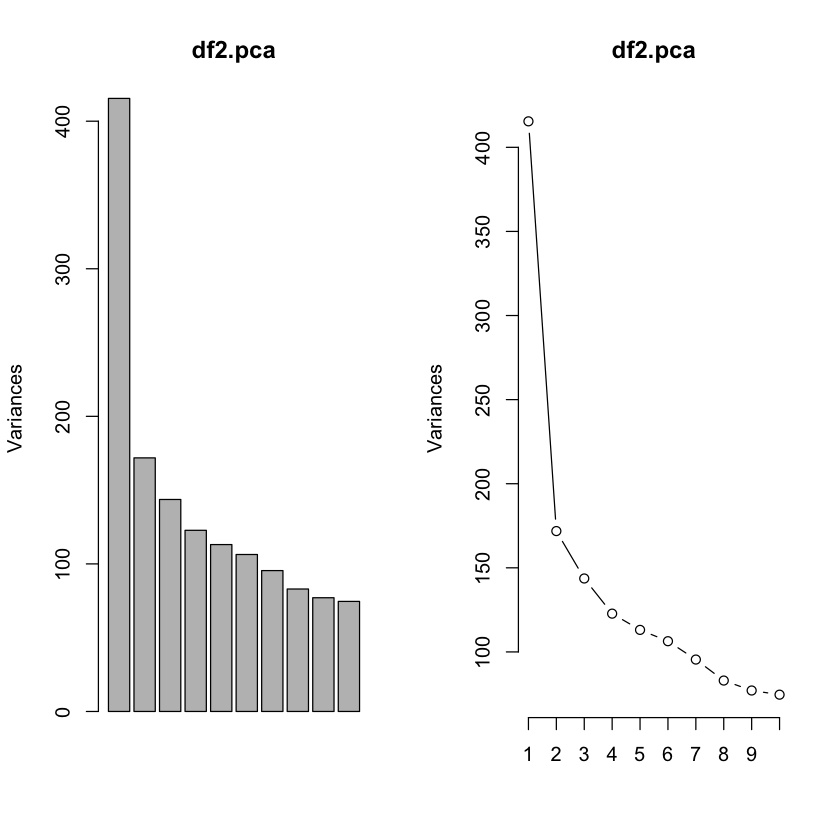

In [188]:
#----------------------------------------------------------------------OPTIMIZED FOR CHAT Deseq2 EXPERIMENTS----------------------------------------------------------------------

#Select relevant rows and columns in dataframe then port to new dataframe
df1 <- res2
df1 <- data.frame(df1)
#df1[is.na(df1)] <- 1
row.names(df1) <- df1[,1]
names(df1) <- c("ClusterID","control_1","control_2","control_3","control_4","control_5","control_6","control_7","control_8","control_9","treatment_1","treatment_2","treatment_3","treatment_4","treatment_5","treatment_6","treatment_7","treatment_8","baseMean","Log2foldchange","lfcSE","stat","pvalue","padj")

df2 <- t(df1[,c(2:18)])

#------------DESEQ2 Style PCA Plot w/ Top 500 selection --------------

df1a <- df1[,c(2:18)]
ntop <- 500
rv <- rowVars(df1a)
select <- order(rv, decreasing = TRUE)[seq_len(min(ntop, length(rv)))]
mat <- t( df1a[select, ] )

#Create PCA object
df1a.pca <- prcomp(mat, center=TRUE, scale.=TRUE)

#Output PCA details
layout(matrix(1:2, ncol=2))
screeplot(df1a.pca)
screeplot(df1a.pca, type="lines")
summary(df1a.pca)$importance

#Group samples in PCA object and assign label colors
pch.group <- c(rep(21, times=9), rep(21, times=8))
col.group <- c(rep("red", times=9), rep("blue", times=8))

#Plot PCA
svg(filename="ChatMouse-SC-DESEQ2-95-PCA-TOP500.svg", width = 10, height = 10)
layout(matrix(1:1, ncol=1))
plot(df1a.pca$x[,1], df1a.pca$x[,2], xlab=paste("PCA 1 (", round(summary(df1a.pca)$importance[2]*100, 1), "%)", sep = ""), ylab=paste("PCA 2 (", round(summary(df1a.pca)$importance[5]*100, 1), "%)", sep = ""), pch=pch.group, col="black", bg=col.group, cex=2, las=1, asp=1)
abline(v=0, lty=2, col="grey")
abline(h=0, lty=2, col="grey")
#text(df2.pca$x[,1], df2.pca$x[,2], labels=row.names(df2.pca$x), pos=c(1,3,4,2), font=1)
text(df1a.pca$x[,1], df1a.pca$x[,2], labels=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17), pos=c(1,2,4,3), font=1, cex=1.5)
legend("topright", legend=c("Control", "Treated"), col="black", pt.bg=c("red", "blue"), pch=c(21, 21), pt.cex=2)
#title(main="title_here")
#Create parameters for elipse rendering of PCA groups
#Get individuals (observations) as a matrix
tab <- matrix(c(df1a.pca$x[,1], df1a.pca$x[,2]), ncol=2)
#Calculate correlations
c1 <- cor(tab[1:9,])
c2 <- cor(tab[10:17,])
#Plot Elipses
polygon(ellipse(c1*(max(abs(df1a.pca$rotation))*200), centre=colMeans(tab[1:9,]), level=.95), col=adjustcolor("pink2", alpha.f=0.25), border="pink")
polygon(ellipse(c2*(max(abs(df1a.pca$rotation))*200), centre=colMeans(tab[10:17,]), level=.95), col=adjustcolor("skyblue2", alpha.f=0.25), border="skyblue")
grid(col="lightgray")
dev.off()

#-----------------Normal PCA Plot w/ no selection-------------------

#Create PCA object
df2.pca <- prcomp(df2, center=TRUE, scale.=TRUE)

#Output PCA details
layout(matrix(1:2, ncol=2))
screeplot(df2.pca)
screeplot(df2.pca, type="lines")
summary(df2.pca)$importance

#Group samples in PCA object and assign label colors
pch.group <- c(rep(21, times=9), rep(21, times=8))
col.group <- c(rep("red", times=9), rep("blue", times=8))

#Plot PCA
svg(filename="ChatMouse-SC-DESEQ2-95-PCA-ALL.svg", width = 10, height = 10)
layout(matrix(1:1, ncol=1))
plot(df2.pca$x[,1], df2.pca$x[,2], xlab=paste("PCA 1 (", round(summary(df2.pca)$importance[2]*100, 1), "%)", sep = ""), ylab=paste("PCA 2 (", round(summary(df2.pca)$importance[5]*100, 1), "%)", sep = ""), pch=pch.group, col="black", bg=col.group, cex=2, las=1, asp=1)
abline(v=0, lty=2, col="grey")
abline(h=0, lty=2, col="grey")
#text(df2.pca$x[,1], df2.pca$x[,2], labels=row.names(df2.pca$x), pos=c(1,3,4,2), font=1)
text(df2.pca$x[,1], df2.pca$x[,2], labels=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17), pos=c(1,2,4,3), font=1, cex=1.5)
legend("topright", legend=c("Control", "Treated"), col="black", pt.bg=c("red", "blue"), pch=c(21, 21), pt.cex=2)
#title(main="title_here")
#Create parameters for elipse rendering of PCA groups
#Get individuals (observations) as a matrix
tab <- matrix(c(df2.pca$x[,1], df2.pca$x[,2]), ncol=2)
#Calculate correlations
c1 <- cor(tab[1:9,])
c2 <- cor(tab[10:17,])
#Plot Elipses
polygon(ellipse(c1*(max(abs(df2.pca$rotation))*200), centre=colMeans(tab[1:9,]), level=.95), col=adjustcolor("pink2", alpha.f=0.25), border="pink")
polygon(ellipse(c2*(max(abs(df2.pca$rotation))*200), centre=colMeans(tab[10:17,]), level=.95), col=adjustcolor("skyblue2", alpha.f=0.25), border="skyblue")
grid(col="lightgray")
dev.off()

#----------------------------------------------------------------------

# Distance Plot
tiff(filename="ChatMouse-SC-DESEQ2-95-Distance.tiff", width = 600, height = 600)
distance <- get_dist(df2)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"), lab_size = 18)
dev.off()

# Volcano Plots
svg(filename="ChatMouse-SC-DESEQ2-95-Volcanos.svg", width=20, height=6)
p1 <- EnhancedVolcano(df1, lab = df1$ClusterID, x = 'Log2foldchange', y = 'pvalue', xlim=c(-5,5), pCutoff=0.05, ylim=c(0,6), legendPosition = "right", title = "deseq2 p-value", colAlpha = 1, legendLabels = c('Not Sig.', 'Not Sig., Fold Change >2', 'Sig.', 'Sig., Fold Change >2'))
p2 <- EnhancedVolcano(df1, lab = df1$ClusterID, x = 'Log2foldchange', y = 'padj', xlim = c(-5,5), pCutoff=0.2, ylim=c(0,3), legendPosition = "right", legendLabels = c('Not Sig.', 'Not Sig., Fold Change >2', 'Sig.', 'Sig., Fold Change >2'), title = "deseq2 adjusted p-value", colAlpha = 1)
#p1
#p2
grid.arrange(p1, p2, nrow=1)
dev.off()

df1[is.na(df1)] <- 1
write.csv(df1, 'ChatMouse-SC-DESEQ2-95.csv', row.names=FALSE)

In [189]:
range(df1$Log2foldchange)
min(df1$pvalue)
min(df1$padj)

[1] -3.592977  4.302577

[1] 2.376265e-05

[1] 0.01573088

In [158]:
countData <- read.csv('DESEQ2input/MouseTH-assembleddump-95.txt', header = TRUE, sep = ",", check.names=FALSE)
head(countData)

metaData <- read.csv('DESEQ2input/TH-metadata.csv', header = TRUE, sep = ",", check.names=FALSE)
metaData

dds <- DESeqDataSetFromMatrix(countData=countData, 
                              colData=metaData, 
                              design=~dex, tidy = TRUE)
keep <- rowSums(counts(dds)) > 0
dds <- dds[keep,]

dds

dds <- DESeq(dds)

res <- results(dds)
head(results(dds, tidy=TRUE)) #let's look at the results table

summary(res) #summary of results

res <- res[order(res$padj),]
head(res)

vsdata <- varianceStabilizingTransformation(dds, blind=FALSE)

vsdata2 <- data.frame(assay(vsdata))
res <- data.frame(res)

res2 <- merge(vsdata2, res, by="row.names")
res2$Row.names <- as.numeric(gsub("Cluster", "", res2$Row.names))

,Cluster,18,19,20,21,22,23,24,25,26,27,28,29,30,31
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Cluster0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Cluster1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cluster2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cluster3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Cluster4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Cluster5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


id,dex,celltype,geo_id
<int>,<fct>,<fct>,<int>
18,control,fecal,18
19,control,fecal,19
20,control,fecal,20
21,control,fecal,21
22,control,fecal,22
23,control,fecal,23
24,control,fecal,24
25,activated,fecal,25
26,activated,fecal,26


  it appears that the last variable in the design formula, 'dex',
  has a factor level, 'control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').



class: DESeqDataSet 
dim: 1715 14 
metadata(1): version
assays(1): counts
rownames(1715): Cluster11 Cluster13 ... Cluster35667 Cluster36546
rowData names(0):
colnames(14): 18 19 ... 30 31
colData names(4): id dex celltype geo_id

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 6 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cluster11,4.7560495,-0.07125766,0.9496411,-0.07503641,0.9401857,0.9859862
2,Cluster13,0.5953017,-2.68486283,2.5060255,-1.07136292,0.2840063,NA
3,Cluster19,0.4089716,0.82823467,3.0027220,0.27582796,0.7826802,NA
4,Cluster42,0.1284762,-0.74968776,3.0845751,-0.24304410,0.8079712,NA
5,Cluster50,0.1333108,-0.74968776,3.0845751,-0.24304410,0.8079712,NA
6,Cluster51,0.1456351,-0.74968776,3.0845751,-0.24304410,0.8079712,NA



out of 1713 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1, 0.058%
LFC < 0 (down)     : 23, 1.3%
outliers [1]       : 0, 0%
low counts [2]     : 1031, 60%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



log2 fold change (MLE): dex control vs activated 
Wald test p-value: dex control vs activated 
DataFrame with 6 rows and 6 columns
                     baseMean    log2FoldChange             lfcSE
                    <numeric>         <numeric>         <numeric>
Cluster11694 6.97167519200523  3.97290446348979 0.676740786414593
Cluster419   3.98785163961026 -4.56526348381873 0.938583397663946
Cluster323   18.4061133082303 -1.18946949667565  0.28031428351562
Cluster6675  2.44898217331906 -4.28885853999538  1.01813154943293
Cluster20414 2.20310449595991 -4.58381322731844  1.08470267356015
Cluster13041 2.19583167068701 -4.57906027944946   1.0991170395617
                          stat               pvalue                 padj
                     <numeric>            <numeric>            <numeric>
Cluster11694   5.8706443342043 4.34104661686073e-09 2.96927588593274e-06
Cluster419   -4.86399343434081 1.15040731055703e-06 0.000393439300210504
Cluster323   -4.24334244319507 2.20215001081464e-

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,13.80417,7.019395,6.11389,5.790935,5.515793,5.255146,4.737666,4.598174,4.472822,4.346825,4.149764,4.018795,3.918802,6.472367e-15
Proportion of Variance,0.38111,0.098540,0.07476,0.067070,0.060850,0.055230,0.044890,0.042290,0.040010,0.037790,0.034440,0.032300,0.030710,0.000000e+00
Cumulative Proportion,0.38111,0.479650,0.55441,0.621480,0.682330,0.737560,0.782460,0.824740,0.864750,0.902540,0.936980,0.969290,1.000000,1.000000e+00


pdf 
  2

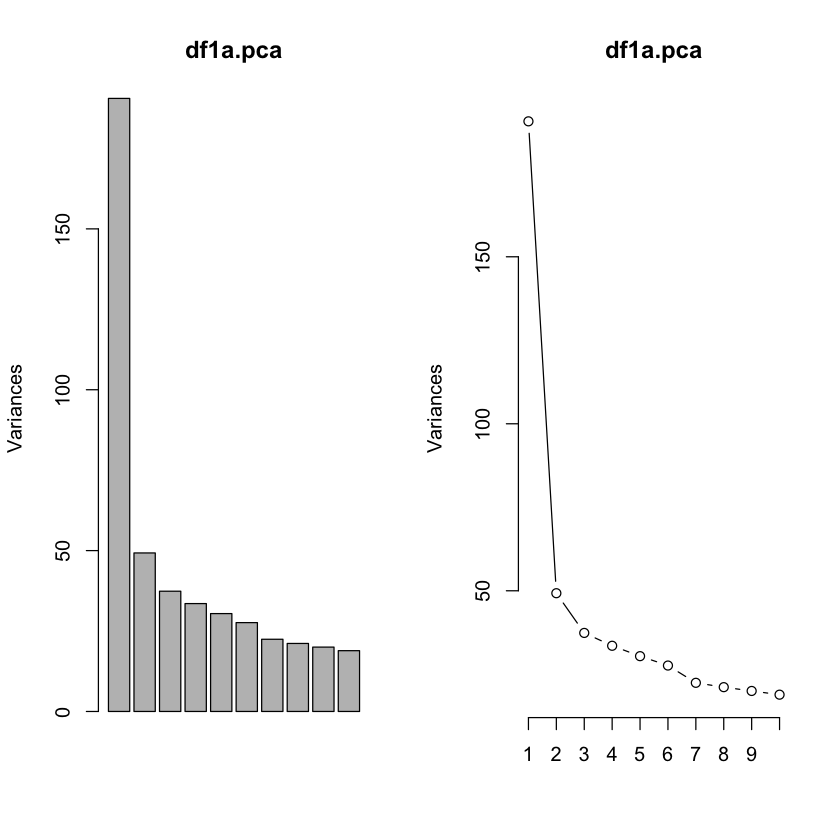

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,21.01169,13.64483,12.71280,11.87832,10.60457,10.38121,10.02612,9.718298,9.249752,8.984215,8.503111,8.334775,7.834392,6.105143e-14
Proportion of Variance,0.25743,0.10856,0.09424,0.08227,0.06557,0.06284,0.05861,0.055070,0.049890,0.047060,0.042160,0.040510,0.035790,0.000000e+00
Cumulative Proportion,0.25743,0.36599,0.46023,0.54250,0.60807,0.67091,0.72952,0.784590,0.834480,0.881550,0.923700,0.964210,1.000000,1.000000e+00


pdf 
  2

pdf 
  2

pdf 
  2

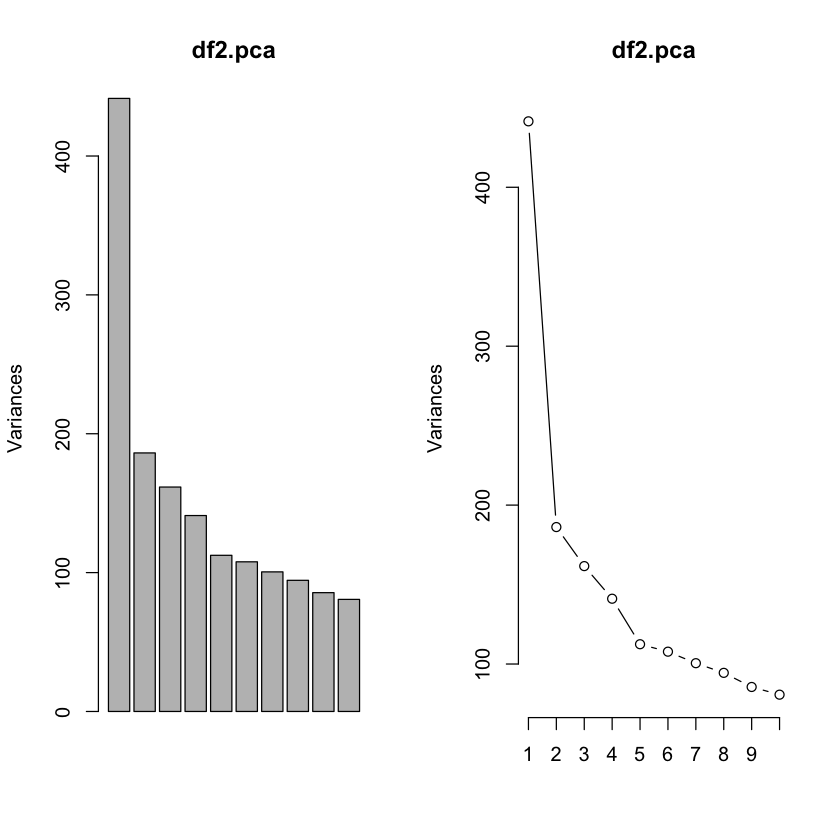

In [159]:
#----------------------------------------------------------------------OPTIMIZED FOR TH Deseq2 EXPERIMENTS----------------------------------------------------------------------

#Select relevant rows and columns in dataframe then port to new dataframe
df1 <- res2
df1 <- data.frame(df1)
#df1[is.na(df1)] <- 1
row.names(df1) <- df1[,1]
names(df1) <- c("ClusterID","control_1","control_2","control_3","control_4","control_5","control_6","control_7","treatment_1","treatment_2","treatment_3","treatment_4","treatment_5","treatment_6","treatment_7","baseMean","Log2foldchange","lfcSE","stat","pvalue","padj")

df2 <- t(df1[,c(2:15)])

#------------DESEQ2 Style PCA Plot w/ Top 500 selection --------------

df1a <- df1[,c(2:15)]
ntop <- 500
rv <- rowVars(df1a)
select <- order(rv, decreasing = TRUE)[seq_len(min(ntop, length(rv)))]
mat <- t( df1a[select, ] )

#Create PCA object
df1a.pca <- prcomp(mat, center=TRUE, scale.=TRUE)

#Output PCA details
layout(matrix(1:2, ncol=2))
screeplot(df1a.pca)
screeplot(df1a.pca, type="lines")
summary(df1a.pca)$importance

#Group samples in PCA object and assign label colors
pch.group <- c(rep(21, times=7), rep(21, times=7))
col.group <- c(rep("red", times=7), rep("blue", times=7))

#Plot PCA
svg(filename="THMouse-SC-DESEQ2-95-PCA-TOP500.svg", width = 10, height = 10)
layout(matrix(1:1, ncol=1))
plot(df1a.pca$x[,1], df1a.pca$x[,2], xlab=paste("PCA 1 (", round(summary(df1a.pca)$importance[2]*100, 1), "%)", sep = ""), ylab=paste("PCA 2 (", round(summary(df1a.pca)$importance[5]*100, 1), "%)", sep = ""), pch=pch.group, col="black", bg=col.group, cex=2, las=1, asp=1)
abline(v=0, lty=2, col="grey")
abline(h=0, lty=2, col="grey")
#text(df2.pca$x[,1], df2.pca$x[,2], labels=row.names(df2.pca$x), pos=c(1,3,4,2), font=1)
text(df1a.pca$x[,1], df1a.pca$x[,2], labels=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14), pos=c(1,2,4,3), font=1, cex=1.5)
legend("topright", legend=c("Control", "Treated"), col="black", pt.bg=c("red", "blue"), pch=c(21, 21), pt.cex=2)
#title(main="title_here")
#Create parameters for elipse rendering of PCA groups
#Get individuals (observations) as a matrix
tab <- matrix(c(df1a.pca$x[,1], df1a.pca$x[,2]), ncol=2)
#Calculate correlations
c1 <- cor(tab[1:7,])
c2 <- cor(tab[8:14,])
#Plot Elipses
polygon(ellipse(c1*(max(abs(df1a.pca$rotation))*200), centre=colMeans(tab[1:7,]), level=.95), col=adjustcolor("pink2", alpha.f=0.25), border="pink")
polygon(ellipse(c2*(max(abs(df1a.pca$rotation))*200), centre=colMeans(tab[8:14,]), level=.95), col=adjustcolor("skyblue2", alpha.f=0.25), border="skyblue")
grid(col="lightgray")
dev.off()

#-----------------Normal PCA Plot w/ no selection-------------------

#Create PCA object
df2.pca <- prcomp(df2, center=TRUE, scale.=TRUE)

#Output PCA details
layout(matrix(1:2, ncol=2))
screeplot(df2.pca)
screeplot(df2.pca, type="lines")
summary(df2.pca)$importance

#Group samples in PCA object and assign label colors
pch.group <- c(rep(21, times=7), rep(21, times=7))
col.group <- c(rep("red", times=7), rep("blue", times=7))

#Plot PCA
svg(filename="THMouse-SC-DESEQ2-95-PCA-ALL.svg", width = 10, height = 10)
layout(matrix(1:1, ncol=1))
plot(df2.pca$x[,1], df2.pca$x[,2], xlab=paste("PCA 1 (", round(summary(df2.pca)$importance[2]*100, 1), "%)", sep = ""), ylab=paste("PCA 2 (", round(summary(df2.pca)$importance[5]*100, 1), "%)", sep = ""), pch=pch.group, col="black", bg=col.group, cex=2, las=1, asp=1)
abline(v=0, lty=2, col="grey")
abline(h=0, lty=2, col="grey")
#text(df2.pca$x[,1], df2.pca$x[,2], labels=row.names(df2.pca$x), pos=c(1,3,4,2), font=1)
text(df2.pca$x[,1], df2.pca$x[,2], labels=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14), pos=c(1,2,4,3), font=1, cex=1.5)
legend("topright", legend=c("Control", "Treated"), col="black", pt.bg=c("red", "blue"), pch=c(21, 21), pt.cex=2)
#title(main="title_here")
#Create parameters for elipse rendering of PCA groups
#Get individuals (observations) as a matrix
tab <- matrix(c(df2.pca$x[,1], df2.pca$x[,2]), ncol=2)
#Calculate correlations
c1 <- cor(tab[1:7,])
c2 <- cor(tab[8:14,])
#Plot Elipses
polygon(ellipse(c1*(max(abs(df2.pca$rotation))*200), centre=colMeans(tab[1:7,]), level=.95), col=adjustcolor("pink2", alpha.f=0.25), border="pink")
polygon(ellipse(c2*(max(abs(df2.pca$rotation))*200), centre=colMeans(tab[8:14,]), level=.95), col=adjustcolor("skyblue2", alpha.f=0.25), border="skyblue")
grid(col="lightgray")
dev.off()

#----------------------------------------------------------------------

# Distance Plot
tiff(filename="THMouse-SC-DESEQ2-95-Distance.tiff", width = 600, height = 600)
distance <- get_dist(df2)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"), lab_size = 18)
dev.off()

# Volcano Plots
svg(filename="THMouse-SC-DESEQ2-95-Volcanos.svg", width=20, height=6)
p1 <- EnhancedVolcano(df1, lab = df1$ClusterID, x = 'Log2foldchange', y = 'pvalue', xlim=c(-6,6), pCutoff=0.05, ylim=c(0,10), legendPosition = "right", title = "deseq2 p-value", colAlpha = 1, legendLabels = c('Not Sig.', 'Not Sig., Fold Change >2', 'Sig.', 'Sig., Fold Change >2'))
p2 <- EnhancedVolcano(df1, lab = df1$ClusterID, x = 'Log2foldchange', y = 'padj', xlim = c(-6,6), pCutoff=0.2, ylim=c(0,7), legendPosition = "right", legendLabels = c('Not Sig.', 'Not Sig., Fold Change >2', 'Sig.', 'Sig., Fold Change >2'), title = "deseq2 adjusted p-value", colAlpha = 1)
#p1
#p2
grid.arrange(p1, p2, nrow=1)
dev.off()

df1[is.na(df1)] <- 1
write.csv(df1, 'THMouse-SC-DESEQ2-95.csv', row.names=FALSE)

In [160]:
range(df1$Log2foldchange)
min(df1$pvalue)
min(df1$padj, is.na = TRUE)

[1] -5.364912  3.972904

[1] 4.341047e-09

[1] 2.969276e-06

In [56]:
df1

,ClusterID,control_1,control_2,control_3,control_4,control_5,control_6,control_7,treatment_1,treatment_2,⋯,treatment_4,treatment_5,treatment_6,treatment_7,baseMean,Log2foldchange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10010,10010,1.454305,2.552513,1.454305,2.561923,1.454305,2.354960,1.454305,2.959620,1.454305,⋯,2.486256,2.125900,1.454305,1.454305,1.67204885,-0.1717822,1.6035613,-0.1071255,0.9146894542,0.98450044
10011,10011,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,⋯,1.454305,2.125900,2.158177,1.454305,0.24604137,-1.4482087,3.0777937,-0.4705347,0.6379730630,0.00000000
10032,10032,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,2.702238,1.454305,⋯,1.454305,1.454305,1.454305,1.454305,0.36408767,-1.9640164,3.0520557,-0.6435061,0.5198957750,0.00000000
10074,10074,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,⋯,1.454305,2.125900,1.454305,1.454305,0.11756519,-0.7496878,3.0845751,-0.2430441,0.8079712373,0.00000000
10110,10110,2.914200,2.954554,2.784520,2.561923,2.604086,3.008264,2.228159,2.556228,2.829400,⋯,2.334573,2.289409,2.858168,2.642169,4.82374035,0.3594253,0.4757309,0.7555223,0.4499356743,0.77325628
10129,10129,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,⋯,2.160961,2.125900,1.454305,1.454305,0.24699826,-1.4521227,3.0776239,-0.4718324,0.6370464171,0.00000000
10140,10140,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,2.393643,1.454305,⋯,1.454305,2.289409,1.454305,2.503324,0.66142203,-2.8373191,2.1596722,-1.3137730,0.1889225927,0.00000000
10178,10178,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,2.203660,⋯,2.622771,2.790403,2.482011,2.887353,1.60302345,-4.1273703,1.1977137,-3.4460409,0.0005688644,0.03242527
10185,10185,1.454305,1.981379,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,1.454305,⋯,1.454305,1.454305,1.454305,1.454305,0.07237732,0.4868944,2.8778595,0.1691863,0.8656500947,0.00000000
